In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [240]:
df = pd.read_csv('/Users/arqavan/Downloads/mobile_data.csv')

In [241]:
df['Battery_capacity'] = df['Battery_capacity'].str.extract('(\d+)')
df['Battery_capacity'] = pd.to_numeric(df['Battery_capacity'], errors='coerce')
battery_mean = df['Battery_capacity'].mean()
df['Battery_capacity'] = df['Battery_capacity'].fillna(battery_mean)

df['Price'] = df['Price'].str.extract(r'(\d+)')  

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
price_mean = df['Price'].mean()
df['Price'] = df['Price'].fillna(price_mean)
df = df.drop_duplicates()

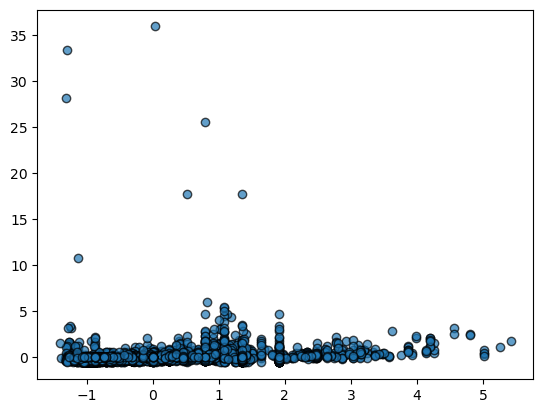

In [242]:
X = df[['Battery_capacity', 'Price']]
X = StandardScaler().fit_transform(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.7, edgecolors='k')
plt.show()

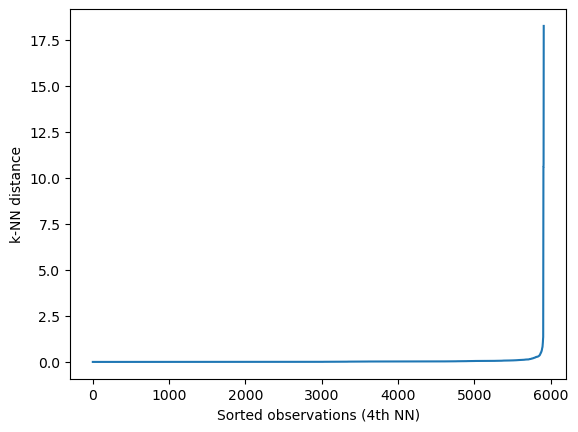

In [243]:

# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [244]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

10.59297973971629


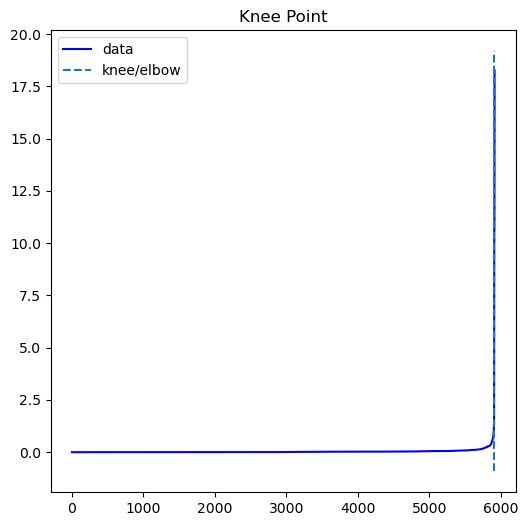

In [245]:
kneedle.plot_knee()
plt.show()

Best Params - eps: 5.6, min_samples: 2
Silhouette Score: 0.9294, Noise Ratio: 0.00%
Number of Clusters: 3


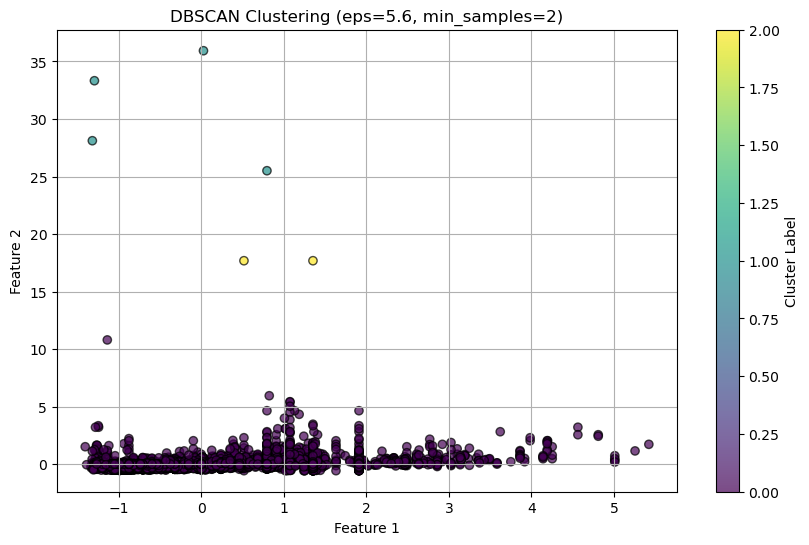

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


eps_values = np.arange(0.1, 20, 0.5)
min_samples_values = range(2, 20)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters == 3:
            sil_score = silhouette_score(X, clusters)
            noise_ratio = (clusters == -1).sum() / len(clusters)
            results.append((eps, min_samples, sil_score, noise_ratio))

results.sort(key=lambda x: x[2], reverse=True)

if results:
    best_params = results[0]
    print(f"Best Params - eps: {best_params[0]}, min_samples: {best_params[1]}")
    print(f"Silhouette Score: {best_params[2]:.4f}, Noise Ratio: {best_params[3]:.2%}")

   
    dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
    clusters = dbscan.fit_predict(X)
    
   
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"Number of Clusters: {n_clusters}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.title(f'DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()
else:
    print("No parameter combination resulted in exactly 3 clusters.")


In [247]:
eps_values = np.arange(0.1, 20, 0.5)
min_samples_values = range(2, 20)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters == 3:
            sil_score = silhouette_score(X, clusters)
            noise_ratio = (clusters == -1).sum() / len(clusters)
            results.append((eps, min_samples, sil_score, noise_ratio))

results.sort(key=lambda x: x[2], reverse=True)
best_params = results[0]
print(f"Best Params - eps: {best_params[0]}, min_samples: {best_params[1]}")
print(f"Silhouette Score: {best_params[2]:.4f}, Noise Ratio: {best_params[3]:.2%}")

Best Params - eps: 5.6, min_samples: 2
Silhouette Score: 0.9294, Noise Ratio: 0.00%
